# Indice
Tarea: Examen Final LyD_IA
Autor: Diego Paredero Blanco


1. Carga de datos

2. Analisis inicial

3. Tratado de datos null

4. Analisis exploratorio de datos

5. Preparacion de datos

6. Modelado

    62. Regresion logistica

    63. Arboles de decision

    64. Random forest

    65. clasificacion
    
7. Modelado con tensorflow

8. Evaluacion de modelos

In [188]:
%pip install numpy > nul
%pip install matplotlib > nul
%pip install pandas > nul
%pip install spicy > nul
%pip install scikit-learn > nul
%pip install seaborn > nul
%pip install tensorflow > nul

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [189]:
# Importacion de librerias
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import sklearn as sk
import random
from typing import Union
import tensorflow as tf
from tensorflow import keras
from sklearn import datasets

# Carga de datos

In [190]:

df_original: pd.DataFrame = pd.read_csv('diamonds.csv')
diamonds_data: pd.DataFrame = df_original.copy()
diamonds_data.head(5)


,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


# Analisis inicial

In [191]:
diamonds_data.describe(include='all')   

,carat,cut,color,clarity,depth,table,price,x,y,z
count,53940.000000,53940,53940,53940,53939.000000,53940.000000,53940.000000,53939.000000,53940.000000,53930.000000
unique,NaN,5,7,8,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Ideal,G,SI1,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,21551,11292,13065,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.797940,NaN,NaN,NaN,61.749413,57.457184,3932.799722,5.731153,5.734526,3.538723
std,0.474011,NaN,NaN,NaN,1.432633,2.234491,3989.439738,1.121771,1.142135,0.705762
min,0.200000,NaN,NaN,NaN,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,NaN,NaN,NaN,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,NaN,NaN,NaN,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,NaN,NaN,NaN,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000


In [192]:
diamonds_data.isnull().sum()

carat       0
cut         0
color       0
clarity     0
depth       1
table       0
price       0
x           1
y           0
z          10
dtype: int64

# Tratado de datos null
El dataset viene practicamente limpio, teniendo la cantidad de registros que tiene vamos a simplemente eliminar las maximo 12 filas en la que los registros no estan completos. Ya que son solo un 0,024% de los registros

In [193]:
#eliminamos las filas con valores nulos
diamonds_data = diamonds_data.dropna()

diamonds_data.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

# Analisis exploratorio de datos

<Axes: >

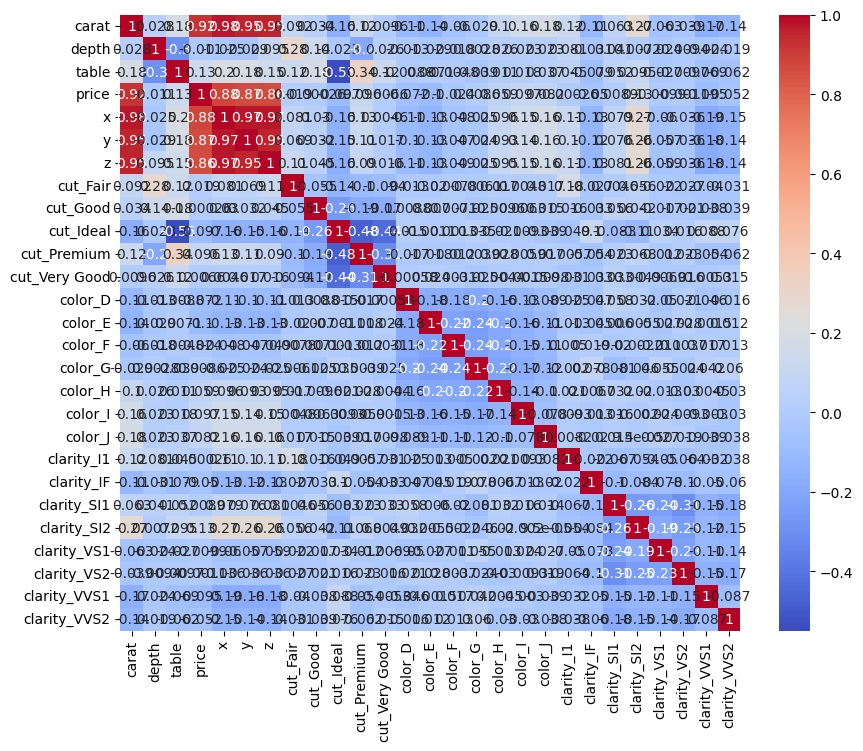

In [194]:
df = diamonds_data.copy()
df_encoded: pd.DataFrame = pd.get_dummies(df.copy())

# Generamos la grafica de correlacion
correlation: pd.DataFrame = df_encoded.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm')

Podemos ver que el tamano del dataset es considerable, asi que vamos a analizar solo las correlaciones con nuestro objetivo, que es la variable 'cut'

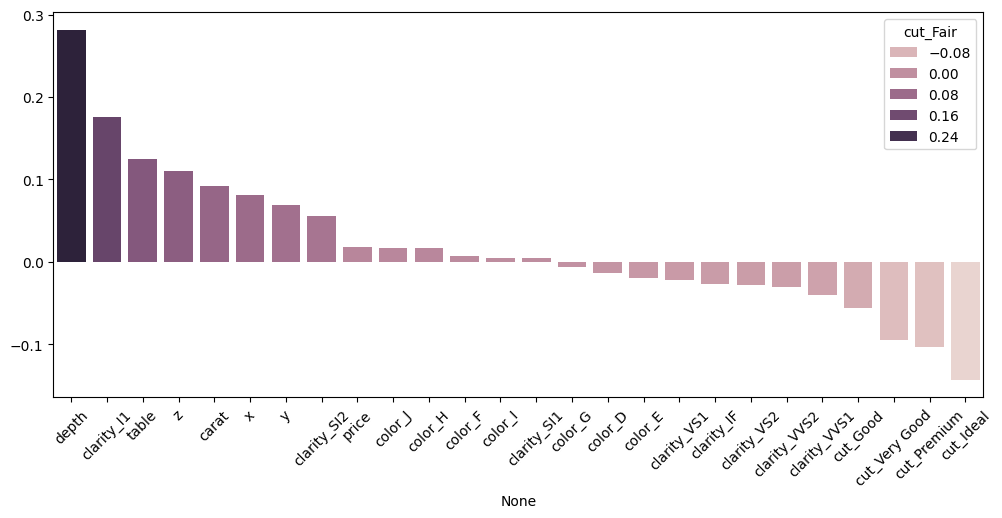

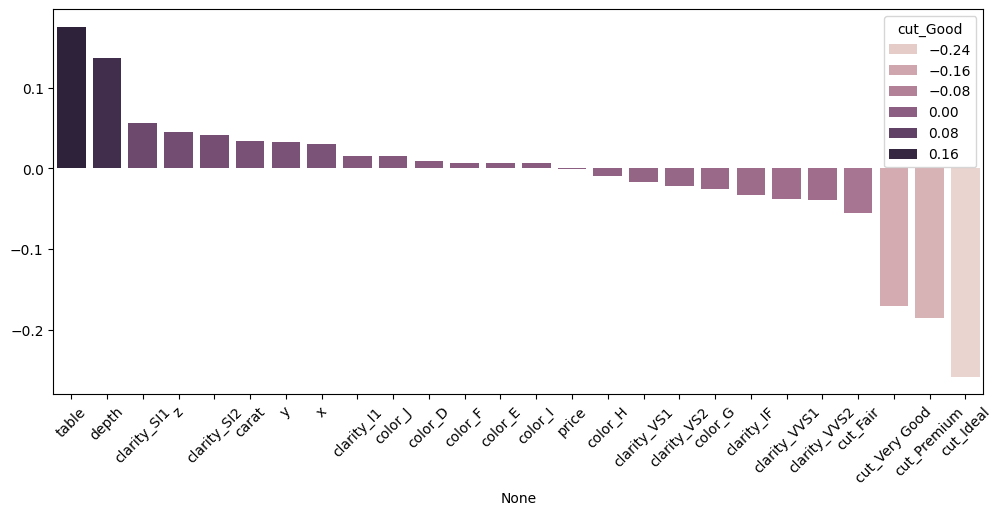

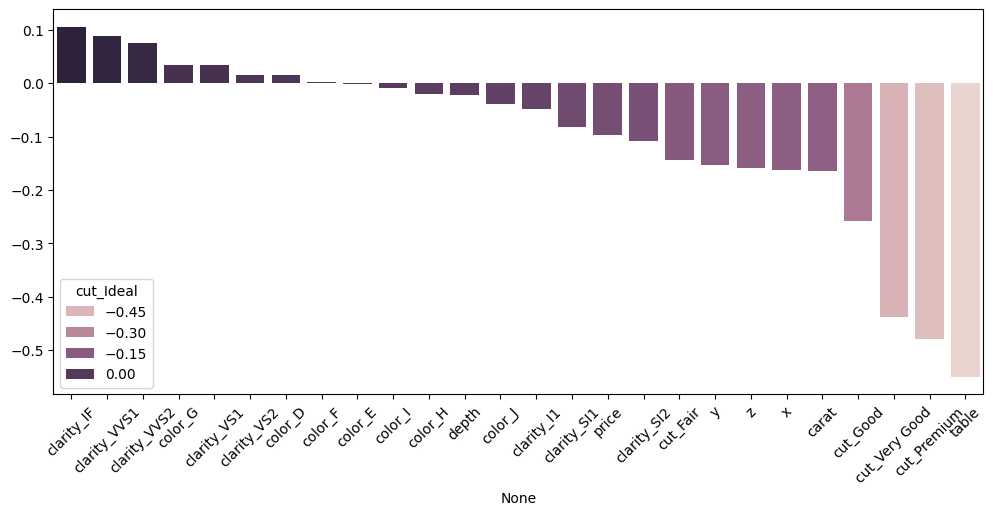

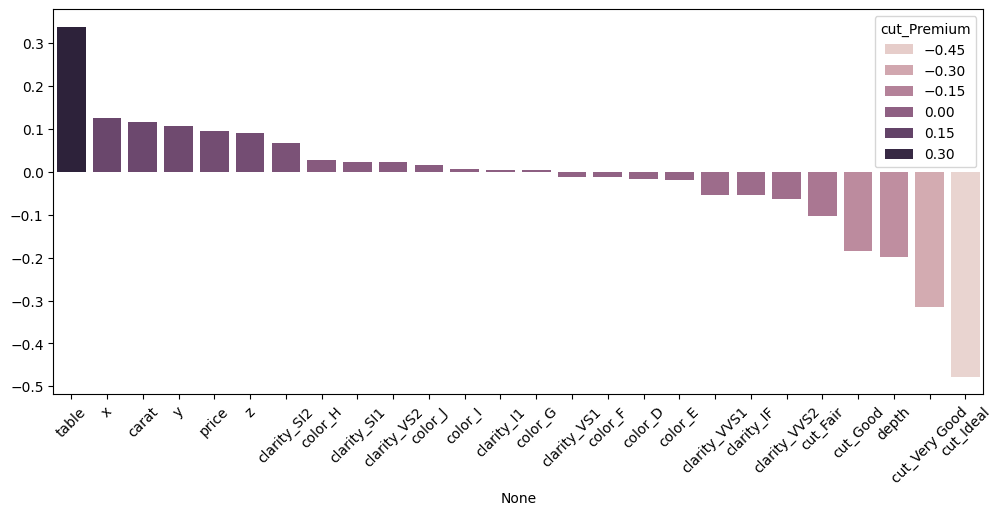

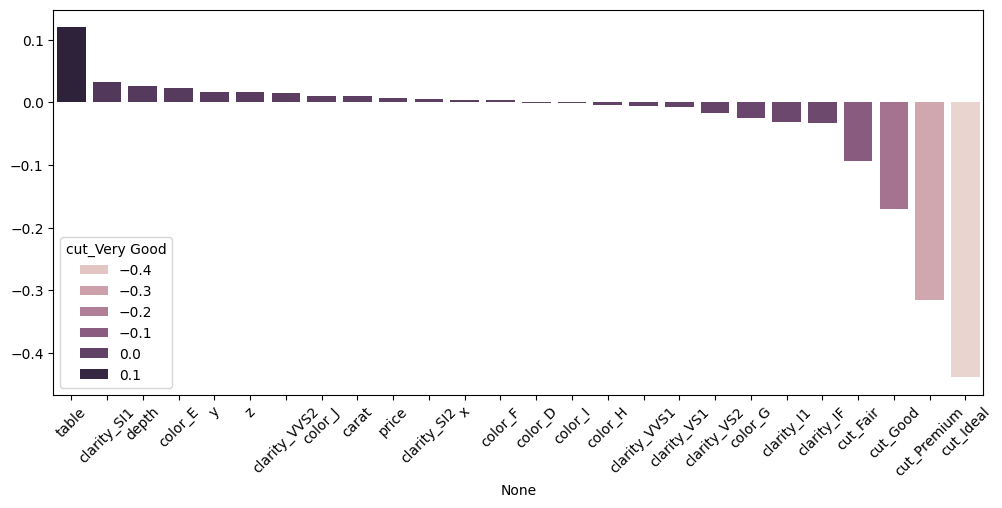

Columns with -0.2 to 0.2 correlation in all cases:
['carat', 'price', 'x', 'y', 'z', 'color_D', 'color_E', 'color_F', 'color_G', 'color_H', 'color_I', 'color_J', 'clarity_I1', 'clarity_IF', 'clarity_SI1', 'clarity_SI2', 'clarity_VS1', 'clarity_VS2', 'clarity_VVS1', 'clarity_VVS2']
Number of such columns: 20


In [195]:
def plot_correlation(cut_label):
    corr_price = correlation[f'cut_{cut_label}']
    corr_price = corr_price.sort_values(ascending=False)[1:]
    plt.figure(figsize=(12, 5))
    sns.barplot(x=corr_price.index, y=corr_price.values, hue=corr_price)
    plt.xticks(rotation=45)
    plt.show()

cut_labels = ['Fair', 'Good', 'Ideal', 'Premium', 'Very Good']
columns_consistency_count = {}

for cut_label in cut_labels:
    plot_correlation(cut_label)
    corr_price = correlation[f'cut_{cut_label}']
    for column, value in corr_price.items():
        if -0.2 <= value <= 0.2:
            columns_consistency_count[column] = columns_consistency_count.get(column, 0) + 1


columns_with_low_correlation = [column for column, count in columns_consistency_count.items() if count == len(cut_labels)]

if columns_with_low_correlation:
    print("Columns with -0.2 to 0.2 correlation in all cases:")
    print(columns_with_low_correlation)
    print("Number of such columns:", len(columns_with_low_correlation))
else:
    print("No columns with -0.2 to 0.2 correlation in all cases.")

Por lo que podemos ver la gran mayoria de las columnas casi no tienen influencia en el "cut", las unicas dos que tienen algo de influencia son la variable "table" y la variable "depth"

In [196]:
# Eliminamos las columnas con correlacion menor a 0.2 que no sean los cuts
columns_to_drop = columns_with_low_correlation.copy()
cuts_to_keep = ['cut_Fair', 'cut_Good', 'cut_Ideal', 'cut_Premium', 'cut_Very Good']
for cut in cuts_to_keep:
    if cut in columns_to_drop:
        columns_to_drop.remove(cut)

columns_to_drop = [col for col in columns_to_drop if col in df_encoded.columns]

df_encoded.drop(columns=columns_to_drop, inplace=True)

df_encoded.head(5)



,depth,table,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good
0,61.5,55.0,False,False,True,False,False
1,59.8,61.0,False,False,False,True,False
2,56.9,65.0,False,True,False,False,False
3,62.4,58.0,False,False,False,True,False
4,63.3,58.0,False,True,False,False,False


In [197]:
# devolvemos con los datos actuales el dataframe al formato categorico en el cut
df_aux = df_encoded.copy()
df_aux['cut'] = df_aux[['cut_Fair', 'cut_Good', 'cut_Ideal', 'cut_Premium', 'cut_Very Good']].idxmax(axis=1).apply(lambda x: x.split('_')[1])
df_aux.drop(columns=['cut_Fair', 'cut_Good', 'cut_Ideal', 'cut_Premium', 'cut_Very Good'], inplace=True)

df_aux.head(5)

,depth,table,cut
0,61.5,55.0,Ideal
1,59.8,61.0,Premium
2,56.9,65.0,Good
3,62.4,58.0,Premium
4,63.3,58.0,Good


In [198]:
df = df_aux.copy()

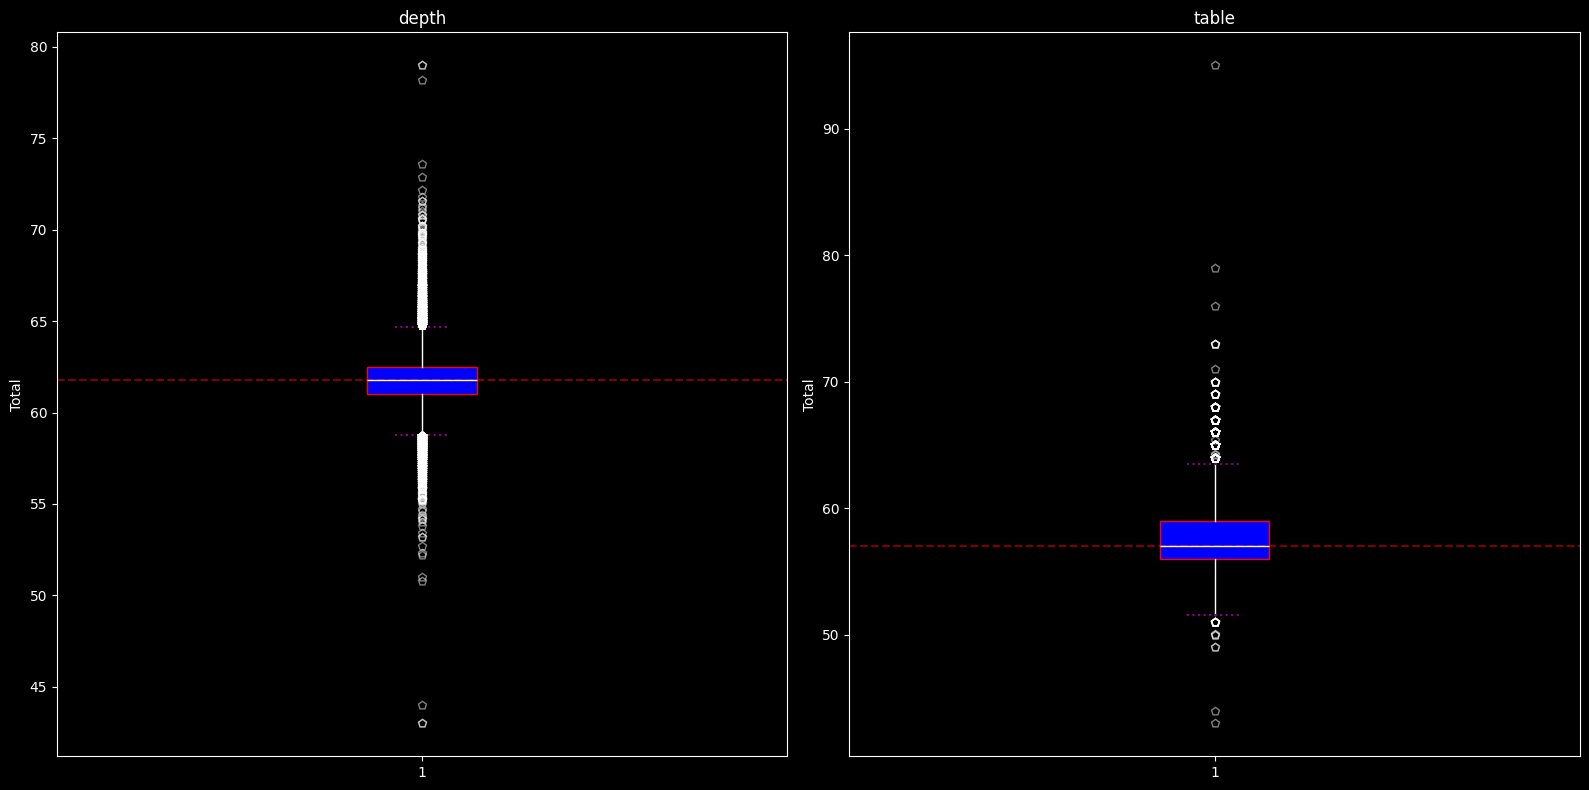

In [212]:
#Observacion de outliers en las diferentes variables
columns_to_plot: list[str] = ['depth', 'table']
working_df: pd.DataFrame = df[columns_to_plot]

plt.style.use('default')
plt.style.use('dark_background')

medians: pd.Series = df[columns_to_plot].median()

fig, axes = plt.subplots(1, 2, figsize=(16, 8))  
boxplots: list[dict] = []

for i, column in enumerate(columns_to_plot):
    boxplot = axes[i].boxplot(df[column], patch_artist=True)
    boxplots.append(boxplot)
    axes[i].set_title(column)
    axes[i].axhline(y=medians.iloc[i], color='red', alpha=0.5,  linestyle='--')
    axes[i].add_patch

# Label for all axis
for ax in axes:
    ax.set_ylabel('Total')

# Custom boxplots
for boxplot in boxplots:
    for cap in boxplot['caps']:
        cap.set(color ='#8B008B', linewidth = 1.5, linestyle =":")
    
    #Custom outliers
    for flier in boxplot['fliers']:
        flier.set(marker =(5, 0),
                color ='#e7298a',
                alpha = 0.5)
    for box in boxplot['boxes']:
        box.set(color="red")
        box.set_facecolor("blue")
plt.tight_layout()
plt.show()
plt.style.use('default')

Hay una exagerada cantidad de outliers vamos a ver en compparacion con el total de cuanto estamos hablando

In [200]:
# comprobacion de cuantos outliers hay en las variables
def detect_outliers(df: pd.DataFrame, columns: list[str], threshold: float = 1.5) -> pd.DataFrame:
    outliers = pd.DataFrame(columns=columns)
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - (threshold * IQR)
        upper_bound = Q3 + (threshold * IQR)
        current_outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
        if not current_outliers.empty:
            outliers = pd.concat([outliers, current_outliers], ignore_index=True)
    return outliers

outliers = detect_outliers(df, columns_to_plot)
print(f"Number of outliers: {outliers.shape[0]}")
print(f"Percentage of outliers: {outliers.shape[0] / df.shape[0] * 100:.2f}%")

Number of outliers: 3145
Percentage of outliers: 5.83%


C:\Users\diego\AppData\Local\Temp\ipykernel_10752\1003359719.py:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  outliers = pd.concat([outliers, current_outliers], ignore_index=True)


In [201]:
#no es excesiva la cantidad de outliers pero por si acaso vamos a revisar que no sea un porcentaje muy alto en alguna de las categorias del cut
def detect_outliers_by_category(df: pd.DataFrame, columns: list[str], category_column: str, threshold: float = 1.5) -> pd.DataFrame:
    outliers = pd.DataFrame(columns=columns)
    for category in df[category_column].unique():
        current_df = df[df[category_column] == category]
        current_outliers = detect_outliers(current_df, columns, threshold)
        outliers = pd.concat([outliers, current_outliers], ignore_index=True)
        print(f"Porcentaje en cada categoria{category}: {current_outliers.shape[0] / current_df.shape[0] * 100:.2f}%")
    return outliers

outliers_by_cut = detect_outliers_by_category(df, columns_to_plot, 'cut')
print("Number of outliers by cut:")
print(outliers_by_cut['cut'].value_counts())



Porcentaje en cada categoriaIdeal: 2.35%
Porcentaje en cada categoriaPremium: 0.87%
Porcentaje en cada categoriaGood: 3.79%
Porcentaje en cada categoriaVery Good: 0.33%
Porcentaje en cada categoriaFair: 28.34%
Number of outliers by cut:
cut
Ideal        507
Fair         456
Good         186
Premium      120
Very Good     40
Name: count, dtype: int64


C:\Users\diego\AppData\Local\Temp\ipykernel_10752\1003359719.py:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  outliers = pd.concat([outliers, current_outliers], ignore_index=True)
C:\Users\diego\AppData\Local\Temp\ipykernel_10752\2679970737.py:7: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  outliers = pd.concat([outliers, current_outliers], ignore_index=True)
C:\Users\diego\AppData\Local\Temp\ipykernel_10752\1003359719.py:12: FutureWarning: The behavior of DataFrame concatenation with empty

Podemos ver que en la categoria Fair los outliers tienen un impacto significativo, por lo que vamos a solo eliminar los del resto de categorias

In [202]:

indices_to_drop = outliers_by_cut[(outliers_by_cut['cut'] != 'Fair')].index
indices_to_drop = indices_to_drop[indices_to_drop.isin(df.index)]

df = df.drop(indices_to_drop)

outliers = detect_outliers(df, columns_to_plot)
print(f"Number of outliers: {outliers.shape[0]}")
print(f"Percentage of outliers: {outliers.shape[0] / df.shape[0] * 100:.2f}%")

print(f"Total rows: {df.shape[0]}")
df.head(5)


Number of outliers: 3067
Percentage of outliers: 5.78%
Total rows: 53077


C:\Users\diego\AppData\Local\Temp\ipykernel_10752\1003359719.py:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  outliers = pd.concat([outliers, current_outliers], ignore_index=True)


,depth,table,cut
853,62.1,56.0,Ideal
854,61.5,56.0,Ideal
855,59.5,57.0,Ideal
856,61.3,59.0,Premium
857,61.6,61.0,Premium


Tenemos nuevos outliers pero estos entrarian dentro del margen anteriormente revisado, asi que vamos mantenerlos

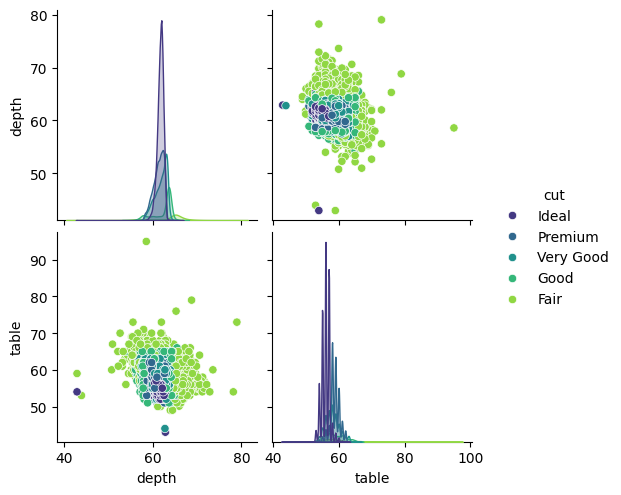

In [203]:
#Vemos un poco todo el dataset con un pairplot
plt.style.use('default')
sns.pairplot(df, hue='cut', palette='viridis')
plt.show()


Podemos ver claramente como los que se salen de las zonas centrales se convierten en cortes decentes, y a mas nos acercamos a ciertas cifras va subiendo de manera exponencial la calidad del corte.

# REGRESIONES

In [213]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np

In [214]:
#Modelo de regresion logistica
df_logistic = df.copy()
y_df_logistic = df_logistic['cut']
X_df_logistic = df_logistic.drop(columns=['cut'])

encoder = LabelEncoder()
y_df_logistic = encoder.fit_transform(y_df_logistic)

X_train_l, X_test_l, y_train_l, y_test_l = train_test_split(X_df_logistic, y_df_logistic, test_size=0.2, random_state=42)

# Escalamos los datos para facilitar el entrenamiento
scaler = StandardScaler()
X_train_l_scaled = scaler.fit_transform(X_train_l)
X_test_l_scaled = scaler.transform(X_test_l)

# Iniciamos el modelo de regresion logistica y lo entrenamos con los datos de entrenamiento escalados
model_logistic = LogisticRegression(max_iter=10000)  
model_logistic.fit(X_train_l_scaled, y_train_l)

y_pred_l = model_logistic.predict(X_test_l_scaled)

print("Mean squared error: ", mean_squared_error(y_test_l, y_pred_l))
print("R2 score: ", r2_score(y_test_l, y_pred_l))
print("Mean absolute error: ", mean_absolute_error(y_test_l, y_pred_l))

residuals_l = y_test_l - y_pred_l

#transformamos en dataframe dado que al escalarlo se convierte en un array de numpy
X_test_l_df = pd.DataFrame(X_test_l_scaled, columns=X_df_logistic.columns)
X_test_l_df['residuals'] = residuals_l
X_test_l_df['prediction'] = encoder.inverse_transform(y_pred_l) 
X_test_l_df['actual_cut'] = encoder.inverse_transform(y_test_l)  

# Show
print(X_test_l_df.head(5))

Mean squared error:  1.0784664657121326
R2 score:  -0.026978430320416136
Mean absolute error:  0.5797852298417483
      depth     table  residuals prediction actual_cut
0  0.522979  0.697181          1    Premium  Very Good
1  0.173593 -1.552833          0      Ideal      Ideal
2 -1.154073 -0.202825          0      Ideal      Ideal
3 -0.105916 -0.652828          0      Ideal      Ideal
4  1.151873 -1.552833          2      Ideal  Very Good


In [215]:
#Modelado con Arboles de decision
from sklearn.tree import DecisionTreeClassifier
df_tree = df.copy()

# codificamos la variable cut
label_encoder = LabelEncoder()
y_df_tree_encoded = label_encoder.fit_transform(df_tree['cut'])

X_df_tree = df_tree.drop(columns=['cut'])

X_train_t, X_test_t, y_train_t, y_test_t = train_test_split(X_df_tree, y_df_tree_encoded, test_size=0.2, random_state=42)

model_tree = DecisionTreeClassifier()
model_tree.fit(X_train_t, y_train_t)

y_pred_t = model_tree.predict(X_test_t)

# Show the results
print("Mean squared error: ", mean_squared_error(y_test_t, y_pred_t))
print("R2 score: ", r2_score(y_test_t, y_pred_t))
print("Mean absolute error: ", mean_absolute_error(y_test_t, y_pred_t))

# Calculate residuals
residuals_t = y_test_t - y_pred_t


X_test_t_modified = X_test_t.copy()
X_test_t_modified['residuals'] = residuals_t
X_test_t_modified['prediction'] = label_encoder.inverse_transform(y_pred_t)  
X_test_t_modified['cut'] = label_encoder.inverse_transform(y_test_t) 

print(X_test_t_modified.head(5))


Mean squared error:  0.7852298417483045
R2 score:  0.25225852081832567
Mean absolute error:  0.4242652599849284
       depth  table  residuals prediction        cut
28933   62.5   59.0          1    Premium  Very Good
4781    62.0   54.0          0      Ideal      Ideal
23964   60.1   57.0          0      Ideal      Ideal
1406    61.6   56.0          0      Ideal      Ideal
31637   63.4   54.0          0  Very Good  Very Good


In [216]:
#Modelado con Random Forest
df_forest = df.copy()
y_df_forest = df_forest['cut']
X_df_forest = df_forest.drop(columns=['cut'])

X_train_f, X_test_f, y_train_f, y_test_f = train_test_split(X_df_forest, y_df_forest, test_size=0.2, random_state=42)

model_forest = RandomForestClassifier()
model_forest.fit(X_train_f, y_train_f)

y_pred_f = model_forest.predict(X_test_f)

#show the results
print("Accuracy: ", accuracy_score(y_test_f, y_pred_f))
print("Precision: ", precision_score(y_test_f, y_pred_f, average='macro'))  # 'macro' average is one of the options
print("Recall: ", recall_score(y_test_f, y_pred_f, average='macro'))
print("F1 Score: ", f1_score(y_test_f, y_pred_f, average='macro'))

X_test_f['prediction'] = y_pred_f
X_test_f['cut'] = y_test_f

#show
X_test_f.head(5)


Accuracy:  0.7224001507159006
Precision:  0.7368423633269512
Recall:  0.6967000495273561
F1 Score:  0.6990611148460562


,depth,table,prediction,cut
28933,62.5,59.0,Premium,Very Good
4781,62.0,54.0,Ideal,Ideal
23964,60.1,57.0,Ideal,Ideal
1406,61.6,56.0,Ideal,Ideal
31637,63.4,54.0,Very Good,Very Good


# Modelados con tensorflow

In [217]:
#Keras 
df_keras = df.copy()
y_df_keras = df_keras['cut']
X_df_keras = df_keras.drop(columns=['cut'])

le = LabelEncoder()
y_df_keras = le.fit_transform(y_df_keras)

X_train_k, X_test_k, y_train_k, y_test_k = train_test_split(X_df_keras, y_df_keras, test_size=0.2, random_state=42)

model_keras = Sequential()
model_keras.add(Dense(4, input_dim=2, activation='relu'))  
model_keras.add(Dense(4, activation='relu'))
model_keras.add(Dense(5, activation='softmax')) 

model_keras.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model_keras.fit(X_train_k, y_train_k, epochs=20, batch_size=10) #DIEGO LOS EPOTCH AQUI, RECUERDA AJUSTARLOS ANTES DE LA ENTREGA FINAL, usando 5 para testeo

_, accuracy = model_keras.evaluate(X_test_k, y_test_k)
print('Accuracy: %.2f' % (accuracy*100))

y_pred_k = model_keras.predict(X_test_k)
y_pred_k = np.argmax(y_pred_k, axis=1)


y_pred_k_categorical = le.inverse_transform(y_pred_k)
y_test_k_categorical = le.inverse_transform(y_test_k)

residuals_k = y_test_k - y_pred_k
residuals_k.mean(), residuals_k.std()

X_test_k['residuals'] = residuals_k
print("Mean squared error: ", mean_squared_error(y_test_k, y_pred_k))
print("R2 score: ", r2_score(y_test_k, y_pred_k))
print("Mean absolute error: ", mean_absolute_error(y_test_k, y_pred_k))

X_test_k['prediction'] = y_pred_k_categorical
X_test_k['cut'] = y_test_k_categorical
X_test_k['residuals'] = residuals_k

X_test_k.head(5)



Epoch 1/20


c:\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4247/4247 ━━━━━━━━━━━━━━━━━━━━ 3s 567us/step - accuracy: 0.4271 - loss: 1.6876
Epoch 2/20
4247/4247 ━━━━━━━━━━━━━━━━━━━━ 2s 539us/step - accuracy: 0.5438 - loss: 1.2381
Epoch 3/20
4247/4247 ━━━━━━━━━━━━━━━━━━━━ 2s 538us/step - accuracy: 0.5484 - loss: 1.2196
Epoch 4/20
4247/4247 ━━━━━━━━━━━━━━━━━━━━ 2s 543us/step - accuracy: 0.5499 - loss: 1.2197
Epoch 5/20
4247/4247 ━━━━━━━━━━━━━━━━━━━━ 2s 534us/step - accuracy: 0.5550 - loss: 1.2119
Epoch 6/20
4247/4247 ━━━━━━━━━━━━━━━━━━━━ 2s 490us/step - accuracy: 0.5569 - loss: 1.2126
Epoch 7/20
4247/4247 ━━━━━━━━━━━━━━━━━━━━ 2s 513us/step - accuracy: 0.5476 - loss: 1.2159
Epoch 8/20
4247/4247 ━━━━━━━━━━━━━━━━━━━━ 2s 512us/step - accuracy: 0.5476 - loss: 1.2130
Epoch 9/20
4247/4247 ━━━━━━━━━━━━━━━━━━━━ 2s 543us/step - accuracy: 0.5471 - loss: 1.2209
Epoch 10/20
4247/4247 ━━━━━━━━━━━━━━━━━━━━ 2s 542us/step - accuracy: 0.5540 - loss: 1.2113
Epoch 11/20
4247/4247 ━━━━━━━━━━━━━━━━━━━━ 2s 535us/step - accuracy: 0.5539 - loss: 1.2147
Epoch 12/20
4247/42

,depth,table,residuals,prediction,cut
28933,62.5,59.0,1,Premium,Very Good
4781,62.0,54.0,0,Ideal,Ideal
23964,60.1,57.0,-1,Premium,Ideal
1406,61.6,56.0,0,Ideal,Ideal
31637,63.4,54.0,2,Ideal,Very Good


# Evaluacion de los diferentes modelos

## Regresion logistica

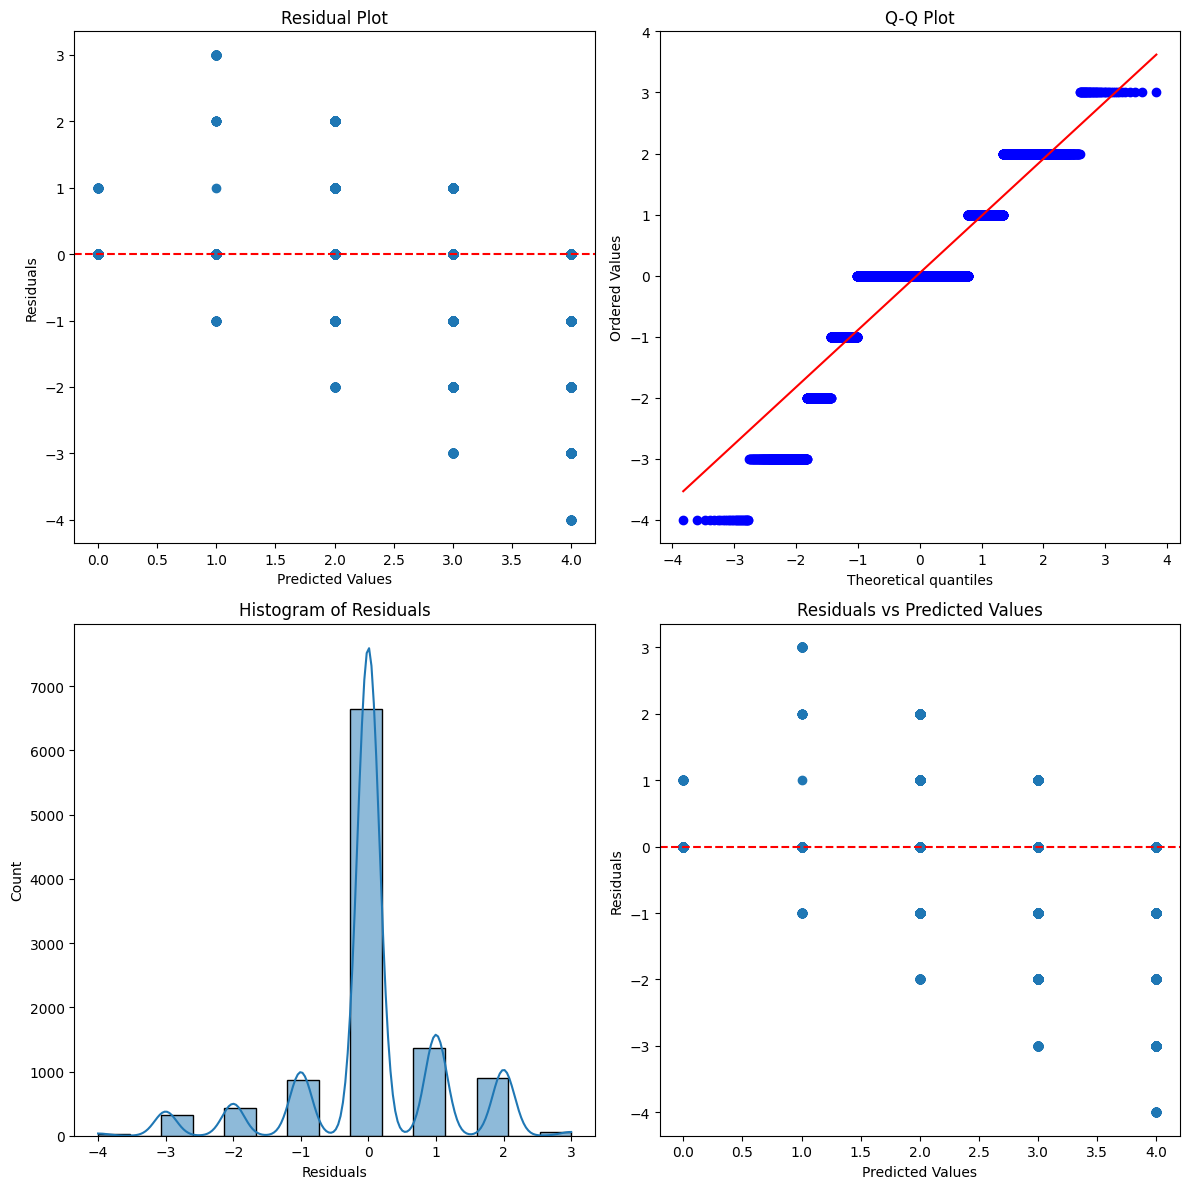

Mean Squared Error: 1.0784664657121326
R-squared: -0.026978430320416136


In [218]:
#regresion logistica
fig_l, axs_l = plt.subplots(2, 2, figsize=(12, 12))

axs_l[0, 0].scatter(y_pred_l, residuals_l)
axs_l[0, 0].axhline(y=0, color='r', linestyle='--')
axs_l[0, 0].set_xlabel('Predicted Values')
axs_l[0, 0].set_ylabel('Residuals')
axs_l[0, 0].set_title('Residual Plot')

sns.histplot(residuals_l, kde=True, ax=axs_l[1, 0])
axs_l[1, 0].set_xlabel('Residuals')
axs_l[1, 0].set_title('Histogram of Residuals')

stats.probplot(residuals_l, dist="norm", plot=axs_l[0, 1])
axs_l[0, 1].set_title('Q-Q Plot')

axs_l[1, 1].scatter(y_pred_l, residuals_l)
axs_l[1, 1].axhline(y=0, color='r', linestyle='--')

axs_l[1, 1].set_xlabel('Predicted Values')
axs_l[1, 1].set_ylabel('Residuals')
axs_l[1, 1].set_title('Residuals vs Predicted Values')

plt.tight_layout()
plt.show()

mse_l = mean_squared_error(y_test_l, y_pred_l)

r2_l = r2_score(y_test_l, y_pred_l)

print(f'Mean Squared Error: {mse_l}')
print(f'R-squared: {r2_l}')


## Arbol de decisioon

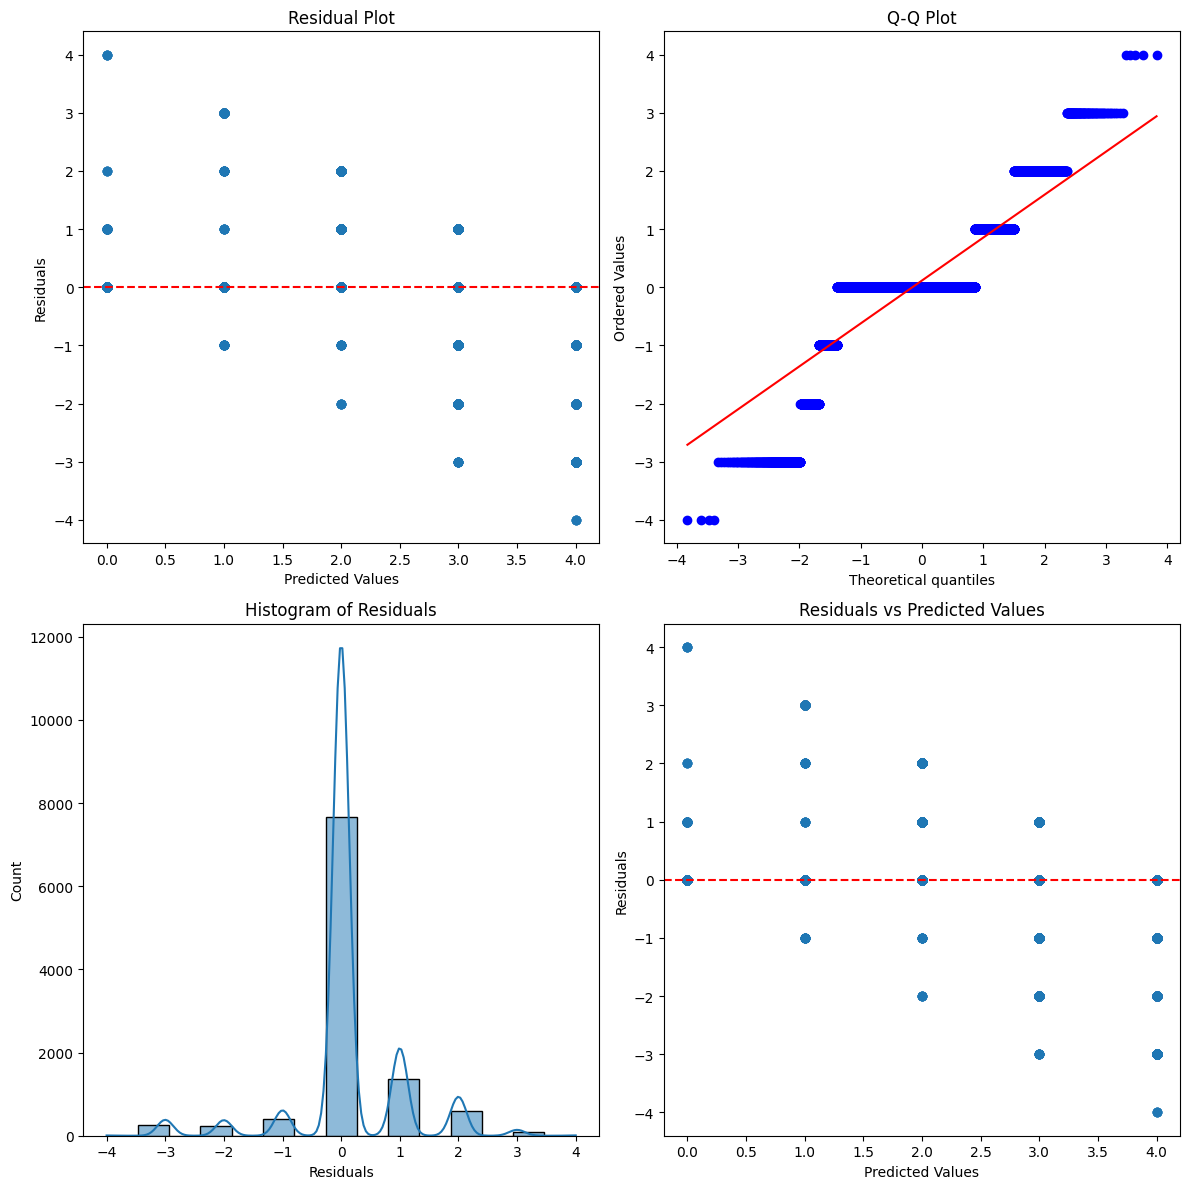

Mean Squared Error: 0.7852298417483045
R-squared: 0.25225852081832567


In [219]:
#arbol de decision

fig_t, axs_t = plt.subplots(2, 2, figsize=(12, 12))

axs_t[0, 0].scatter(y_pred_t, residuals_t)
axs_t[0, 0].axhline(y=0, color='r', linestyle='--')
axs_t[0, 0].set_xlabel('Predicted Values')
axs_t[0, 0].set_ylabel('Residuals')
axs_t[0, 0].set_title('Residual Plot')

sns.histplot(residuals_t, kde=True, ax=axs_t[1, 0])
axs_t[1, 0].set_xlabel('Residuals')
axs_t[1, 0].set_title('Histogram of Residuals')

stats.probplot(residuals_t, dist="norm", plot=axs_t[0, 1])
axs_t[0, 1].set_title('Q-Q Plot')

axs_t[1, 1].scatter(y_pred_t, residuals_t)
axs_t[1, 1].axhline(y=0, color='r', linestyle='--')

axs_t[1, 1].set_xlabel('Predicted Values')
axs_t[1, 1].set_ylabel('Residuals')
axs_t[1, 1].set_title('Residuals vs Predicted Values')

plt.tight_layout()
plt.show()

mse_t = mean_squared_error(y_test_t, y_pred_t)

r2_t = r2_score(y_test_t, y_pred_t)

print(f'Mean Squared Error: {mse_t}')
print(f'R-squared: {r2_t}')


## Keras (deep learning)

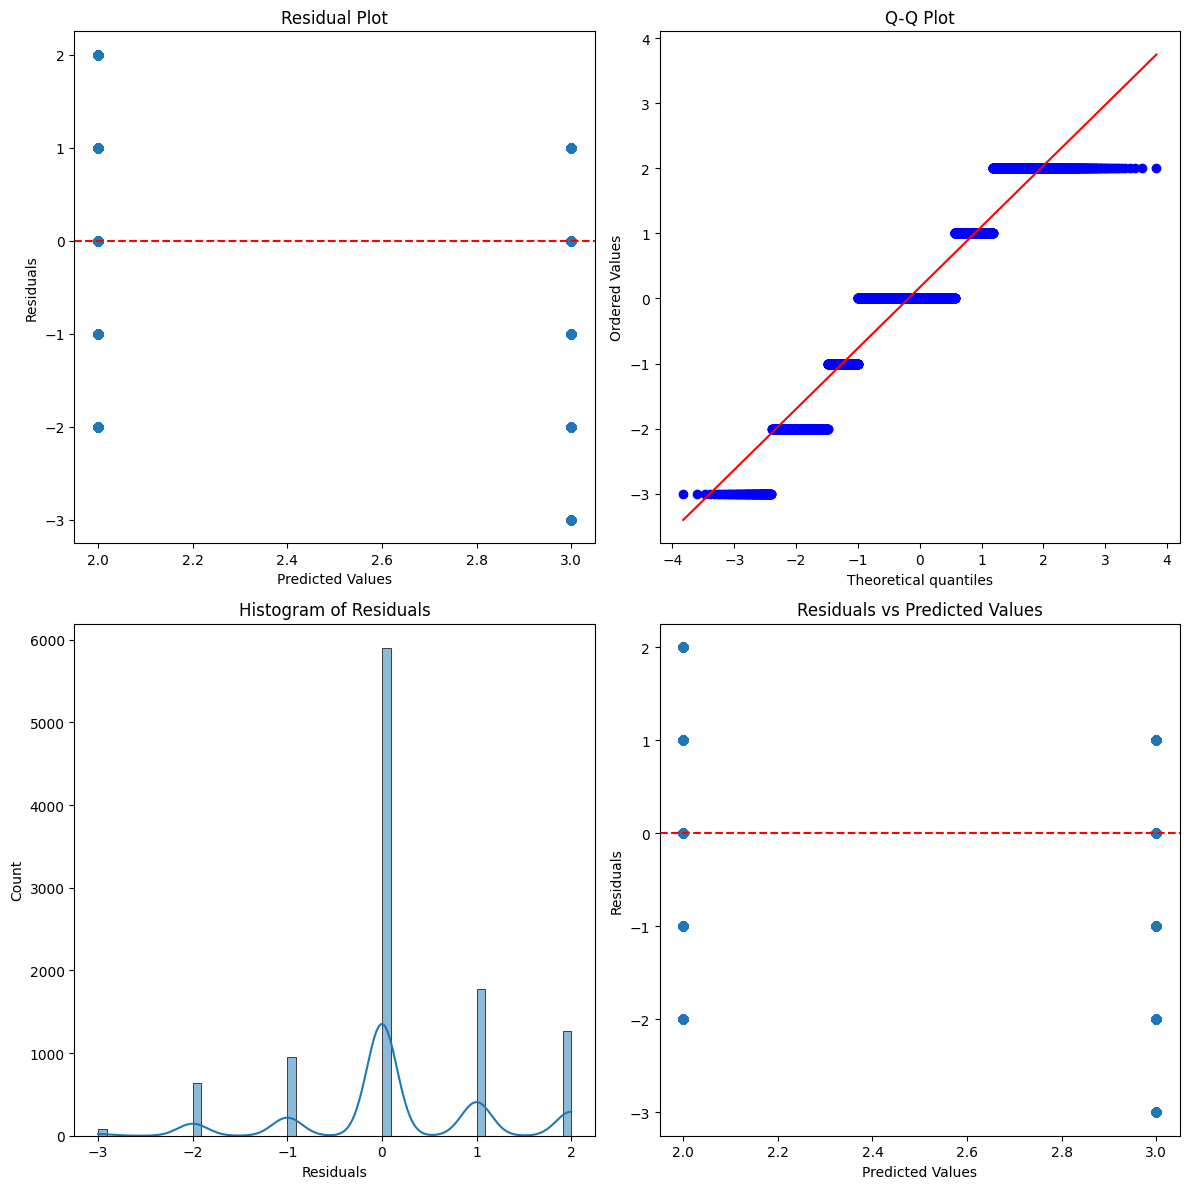

Mean Squared Error: 1.0474755086661642
R-squared: 0.0025329596328912407


In [220]:
#keras
fig, axs = plt.subplots(2, 2, figsize=(12, 12))

axs[0, 0].scatter(y_pred_k, residuals_k)
axs[0, 0].axhline(y=0, color='r', linestyle='--')
axs[0, 0].set_xlabel('Predicted Values')
axs[0, 0].set_ylabel('Residuals')
axs[0, 0].set_title('Residual Plot')

sns.histplot(residuals_k, kde=True, ax=axs[1, 0])
axs[1, 0].set_xlabel('Residuals')
axs[1, 0].set_title('Histogram of Residuals')

stats.probplot(residuals_k, dist="norm", plot=axs[0, 1])
axs[0, 1].set_title('Q-Q Plot')

axs[1, 1].scatter(y_pred_k, residuals_k)
axs[1, 1].axhline(y=0, color='r', linestyle='--')
axs[1, 1].set_xlabel('Predicted Values')
axs[1, 1].set_ylabel('Residuals')
axs[1, 1].set_title('Residuals vs Predicted Values')

plt.tight_layout()
plt.show()
mse = mean_squared_error(y_test_k, y_pred_k)
r2 = r2_score(y_test_k, y_pred_k)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Comparacion de todos los datasets

In [221]:
#comparation of all models in dataset
from sklearn.metrics import accuracy_score
from numpy import argmax

models = [model_logistic, model_tree, model_forest, model_keras]
X_tests = [X_test_l, X_test_t, X_test_f, X_test_k]
y_tests = [y_test_l, y_test_t, y_test_f, y_test_k]
y_preds = [y_pred_l, y_pred_t, y_pred_f, y_pred_k]

for i, model in enumerate(models):
    y_pred = y_preds[i]
    y_test = y_tests[i]
    X_test = X_tests[i]

    if y_pred.ndim > 1 and y_pred.shape[1] > 1:
        y_pred = argmax(y_pred, axis=1)

    #Esta parte es para evitar errores con el modelo de regresion lineal, dado que no tiene el metodo accuracy_score
    #Al estar esta vez trabajando con variables categoricas no seria necesaria la comprobacion de si es un modelo de regresion lineal
    #Ya que no se puede hacer una regresion lineal con variables categoricas
    try:
        if not isinstance(model, LinearRegression):
            accuracy = accuracy_score(y_test, y_pred)
            print(f'Model: {model}')
            print(f'Accuracy: {accuracy}')
        else:
            mse = mean_squared_error(y_test, y_pred)
            print(f'Model: {model}')
            print(f'MSE: {mse}')
    except ValueError as e:
        print(f'Error with model {model}: {e}')
    print('')


Model: LogisticRegression(max_iter=10000)
Accuracy: 0.6253767897513187

Model: DecisionTreeClassifier()
Accuracy: 0.7218349660889224

Model: RandomForestClassifier()
Accuracy: 0.7224001507159006

Model: <Sequential name=sequential_10, built=True>
Accuracy: 0.5555764883195177



Podemos ver que keras es el que menos precision a tenido, esto puede deberse a los pocos epoch que hemos usado

In [222]:
#tabla de comparaciones de predicciones de cada modelo con el valor original
df_comparison = pd.DataFrame()
df_comparison['Real'] = y_test
df_comparison['Regresion Logistica'] = y_pred_l
df_comparison['Arbol de Decision'] = y_pred_t
df_comparison['Random Forest'] = y_pred_f
df_comparison['Keras'] = y_pred_k

df_comparison.head(10)

,Real,Regresion Logistica,Arbol de Decision,Random Forest,Keras
0,4,3,3,Premium,3
1,2,2,2,Ideal,2
2,2,2,2,Ideal,3
3,2,2,2,Ideal,2
4,4,2,4,Very Good,2
5,4,2,4,Very Good,2
6,3,3,3,Premium,3
7,3,3,3,Premium,3
8,2,2,2,Ideal,2
9,2,2,2,Ideal,2


In [223]:
#vamos a coger los que tengan algun valor diferente entre ellos para mostrarlos
df_comparison = df_comparison[(df_comparison['Real'] != df_comparison['Regresion Logistica']) | 
                              (df_comparison['Real'] != df_comparison['Arbol de Decision']) |
                              (df_comparison['Real'] != df_comparison['Random Forest']) |
                              (df_comparison['Real'] != df_comparison['Keras'])]


df_comparison.head(10)

,Real,Regresion Logistica,Arbol de Decision,Random Forest,Keras
0,4,3,3,Premium,3
1,2,2,2,Ideal,2
2,2,2,2,Ideal,3
3,2,2,2,Ideal,2
4,4,2,4,Very Good,2
5,4,2,4,Very Good,2
6,3,3,3,Premium,3
7,3,3,3,Premium,3
8,2,2,2,Ideal,2
9,2,2,2,Ideal,2


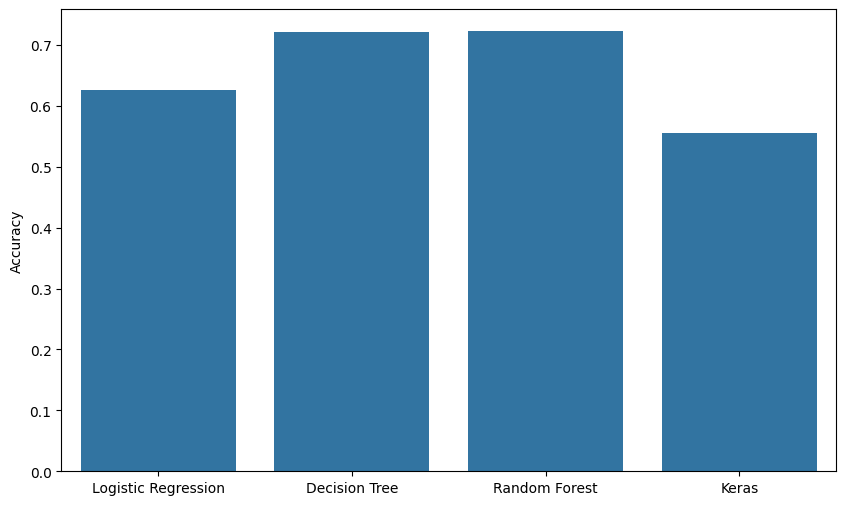

In [224]:
# % of accuracy
accuracy_logistic = accuracy_score(y_test_l, y_pred_l)
accuracy_tree = accuracy_score(y_test_t, y_pred_t)
accuracy_forest = accuracy_score(y_test_f, y_pred_f)
accuracy_keras = accuracy_score(y_test_k, y_pred_k)

accuracies = [accuracy_logistic, accuracy_tree, accuracy_forest, accuracy_keras]
model_names = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'Keras']

plt.figure(figsize=(10, 6))
sns.barplot(x=model_names, y=accuracies)
plt.ylabel('Accuracy')

plt.show()